In [1]:
# import rozneho potrebneho...

%load_ext autoreload
%autoreload

%matplotlib nbagg

import numpy as np
from scipy.integrate import odeint


import sys
sys.path.append('./misc/')

from figFcns_nb import *

# Pokus o riadenie kyvadla samonastavujúcim sa regulátorom (STR)

Tu su definovane diferencialne rovnice riadeneho systemu - kyvadla:

In [2]:
import kyvadloFcns

Pre ilustráciu, prevodová charakteristika kyvadla je nasledujúca:

<IPython.core.display.Javascript object>


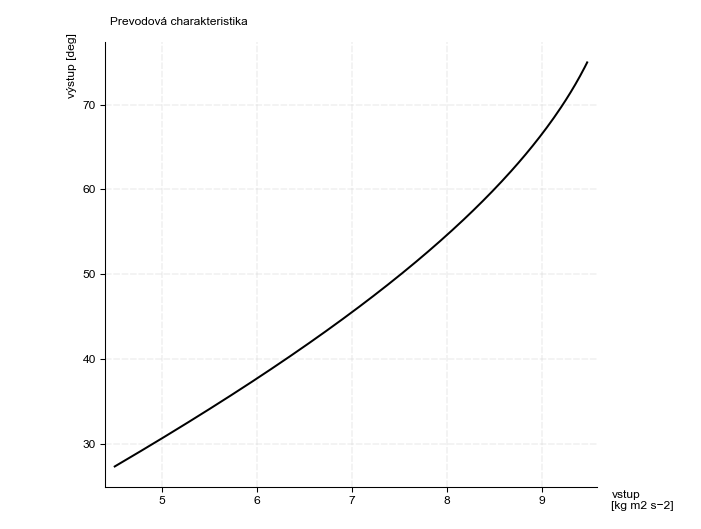

In [3]:
u_pb_vals = np.arange(4.5, 9.5, 0.025)

y_pb_vals = kyvadloFcns.fcn_PrevodChar(u_pb_vals)

figNumNb = 21
execfile('misc/v_fig_STR_kyvadlo_prevd01.py')

Je to teda nelineárny systém...

Simulačná schéma realizujúca STR je v samostatnom súbore a importovaná tu:

In [4]:
from simSchFcns_kyvadlo import *

## Príklad prvý (a asi aj posledný)

In [5]:
# Nastavenia simulacie


sim_t_start = 0
sim_t_final = 120 * 5
sim_T_s = 0.02
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

# ---------------------------------
# Preddefinovane signaly

# ----------------
# signal u_pb

tab_u_pb = np.array([
                    [0, 5],
                    [1*120, 6],
                    [2*120, 7],
                    [3*120, 8],
                    [4*120, 9],
                    ])

sig_u_pb = np.zeros([sim_finalIndex, 1])
for idx in range(sig_u_pb.shape[0]):
    lastValue = tab_u_pb[:,1][tab_u_pb[:,0]<=idx*sim_T_s ][-1]
    sig_u_pb[idx] = lastValue

# vysl vstup sinal (externy) pre kyvadlo...

sig_u_ext = sig_u_pb



# ----------------
# signal r

tmp_timeVect = np.arange(sim_t_start, sim_t_final + sim_T_s, sim_T_s)

tmp_sinVect = (4*np.pi/180) * (np.sin(2*np.pi*(1/20.0)*tmp_timeVect))

sig_r = tmp_sinVect.reshape(-1,1)



# ----------------
# zaciatocne podmienky pre riadeny system

init_cond = np.array([(kyvadloFcns.fcn_PrevodChar(sig_u_pb[0,0])), 0])

Spustenie simulácie:

In [6]:
# Spustenie simulacie

t_log, x_log, u_log, RMNS_y_predict_log, RMNS_theta_log = fcn_simSch_STR(sim_t_start, sim_T_s, sim_finalIndex,
                                     init_cond,
                                     sig_u_ext,
                                     sig_u_pb,
                                     sig_r,
                                     )

Nakreslenie obrázka:

<IPython.core.display.Javascript object>


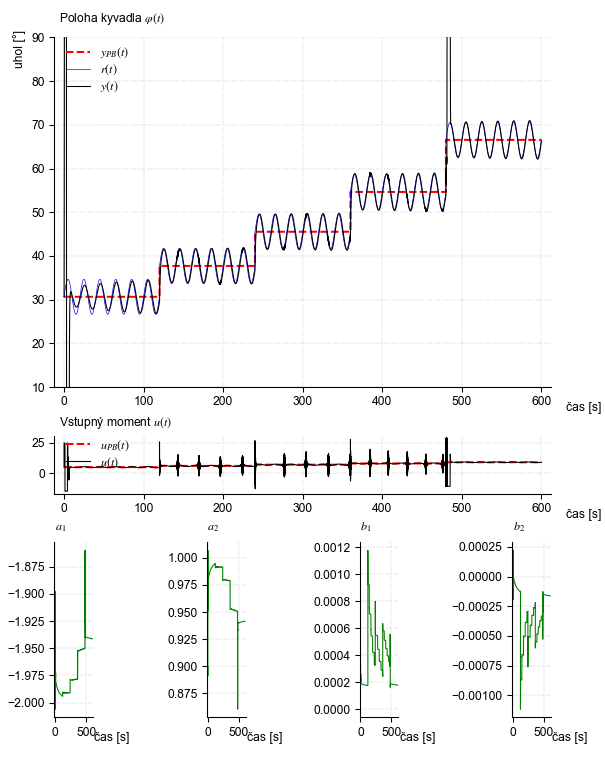

In [7]:
figNumNb = 31
execfile('misc/v_fig_STR_kyvadlo_STR_tmp.py')

Ilustruje to čo sme chceli ukázať, ale nie je to práve najlepší príklad využitia STR. Azda keby bol použitý ARX vyššieho rádu. Na to však človek lenivým nesmie byť.